In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [57]:
calibration = np.genfromtxt("calibration.csv", delimiter=',',skip_header=True).T
x_data = calibration[0]
y_data = []
y_err = []
for i in range(len(x_data)):
    y_data.append(np.mean(calibration[2:,i]))
    y_err.append(math.sqrt(5*0.01**2))

z, cov = np.polyfit(x_data,y_data,1,cov=True) # calculate 1D least square fit
p = np.poly1d(z)
a = [format(z[0], '.3g'), format(np.sqrt(cov[0][0]), '.3g')] # slope and standard deviation in slope
b = [format(z[1], '.2f'), format(np.sqrt(cov[1][1]), '.2f')] # interception and standard deviation in interception
print("slope s and intercept x0: {}".format(z))
print("standard deviation in slope: {}".format(a[1]))
print("standard deviation in intercept: {}".format(b[1]))

slope s and intercept x0: [ 0.06479169 -0.29360339]
standard deviation in slope: 5.64e-05
standard deviation in intercept: 0.03


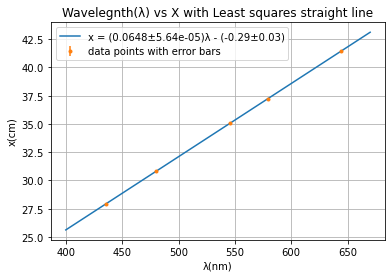

                                 WLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            WLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.991e+06
Date:                Tue, 19 Oct 2021   Prob (F-statistic):                    6.71e-13
Time:                        23:16:46   Log-Likelihood:                          8.9659
No. Observations:                   5   AIC:                                     -15.93
Df Residuals:                       4   BIC:                                     -16.32
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\alber\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [60]:
fig, ax = plt.subplots()
xp = np.linspace(400,670,1000)
ax.plot(xp, p(xp), "-")
ax.errorbar(x_data,y_data,yerr=y_err,fmt=".")
ax.grid()
ax.set(xlabel="\u03BB(nm)", ylabel="x(cm)", title="Wavelegnth(\u03BB) vs X with Least squares straight line")
plt.legend(["x = ({}\u00B1{})\u03BB - ({}\u00B1{})".format(a[0], a[1], b[0], b[1]),"data points with error bars"])
plt.show()

In [38]:
s = (z[0]*1e7) # slope

# theoreticl lines per mm in grating d is 600
d_cal = s/1075 # claculated d
sigma_s = (5.64e-5)*1e7
ep_s = sigma_s/s # epsilon in slope
ep_R = 2/1075 # epsilon in Radius
sigma_d = format(math.sqrt(ep_s**2+ep_R**2)*d_cal, ".1f") # uncertainty in lines per mm
print(format(d_cal,".4g"),"\u00b1 {}".format(sigma_d),"lines/mm")

602.7 ± 1.2 lines/mm


In [64]:
ryc = np.genfromtxt("ryd.csv", delimiter=',',skip_header=True)
# Error propegation in Balmer series calculation
s = 1075 # in mm
sig_s = 2
ep_s = sig_s/s # epsilon in S
sig_d = 1.2 # uncertainty in 1/d
ep_d = sig_d/d_cal # epsilon in 1/d
sd = s*d_cal # s/d
ep_sd = math.sqrt(ep_s**2+ep_d**2) # epsilon in s/d

#calcualte error in lambda from equation(4.2)
x = ryc[:,2]
sig_x = ryc[:,3]
ep_x = sig_x/x
waveLe = 1/(x/sd*1e7) #inverse wavelegnth in nm^-1
sig_waveLe = [] # uncertainty in inverse wavelength
for i in range(3):
    sig_waveLe.append(
            math.sqrt(ep_x[i]**2+ep_sd**2)*waveLe[i])
print(waveLe, sig_waveLe)

[0.001534  0.0020739 0.0023245] [4.193116719108894e-06, 5.703032618034522e-06, 6.8318913373466e-06]


In [67]:
y_data = waveLe
x_data = [(1/4-1/((i+3)**2)) for i in range(3)]

z, cov = np.polyfit(x_data,y_data,1,cov=True) # calculate 1D least square fit
p = np.poly1d(z)
a = [format(z[0], '.3g'), format(np.sqrt(cov[0][0]), '.3g')] # slope and standard deviation in slope
b = [format(z[1], '.2f'), format(np.sqrt(cov[1][1]), '.2f')] # interception and standard deviation in interception


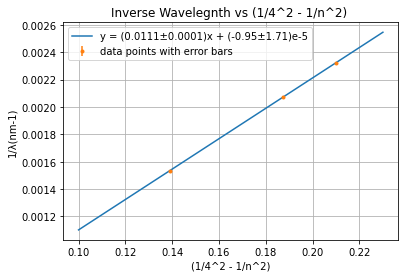

In [84]:
fig, ax = plt.subplots()
xp = np.linspace(0.1,0.23,1000)
ax.plot(xp, p(xp), "-")
ax.errorbar(x_data,y_data,yerr=sig_waveLe,fmt=".")
ax.grid()
ax.set(xlabel="(1/4^2 - 1/n^2)", ylabel="1/\u03BB(nm-1)", title="Inverse Wavelegnth vs (1/4^2 - 1/n^2) ")
plt.legend(["y = ({}\u00B1{})x + {}{}".format(a[0], 0.0001, "(-0.95\u00B11.71)", "e-5"),"data points with error bars"])
plt.show()